# Aniruddha Jain
# G21548859

# Homework 1

In [10]:
# Import libraries for all questions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import investpy
import datetime as dt
# Set no of decimal places for numbers using float_format
pd.options.display.float_format = '{:.2f}'.format 
import numpy_financial as npf

In [11]:
def generate_amortization(loan_value, interest_rate, loan_length):
    # Convert annual interest rate to monthly rate
    monthly_rate = interest_rate / 12

    # Calculate monthly payment using numpy financial library
    num_payments = loan_length
    monthly_payment = -npf.pmt(monthly_rate, num_payments, loan_value)

    # Generate amortization table
    period_list = range(1, num_payments+1)
    interest_paid_list = [-npf.ipmt(monthly_rate, p, num_payments, loan_value) for p in period_list]
    principal_paid_list = [-npf.ppmt(monthly_rate, p, num_payments, loan_value) for p in period_list]
    balance_remaining_list = [loan_value + sum(principal_paid_list[:p]) for p in period_list]

    # Create dataframe for amortization table
    amortization_df = pd.DataFrame({
        "Period": period_list,
        "Payment": monthly_payment,
        "Interest Paid": interest_paid_list,
        "Principal Paid": principal_paid_list,
        "Balance Remaining": balance_remaining_list
    })
    # Plot interest and principal payments over time
    fig, ax = plt.subplots()
    ax.plot(period_list, interest_paid_list, label="Interest Paid")
    ax.plot(period_list, principal_paid_list, label="Principal Paid")
    ax.set_xlabel("Time (months)")
    ax.set_ylabel("Payment amount ($)")
    ax.set_title("Interest and Principal Payments over Time")
    ax.legend()
    plt.show()

    # Plot remaining balance over time
    fig, ax = plt.subplots()
    ax.plot(period_list, balance_remaining_list)
    ax.set_xlabel("Time (months)")
    ax.set_ylabel("Balance Remaining ($)")
    ax.set_title("Remaining Balance over Time")
    plt.show()

    return amortization_df

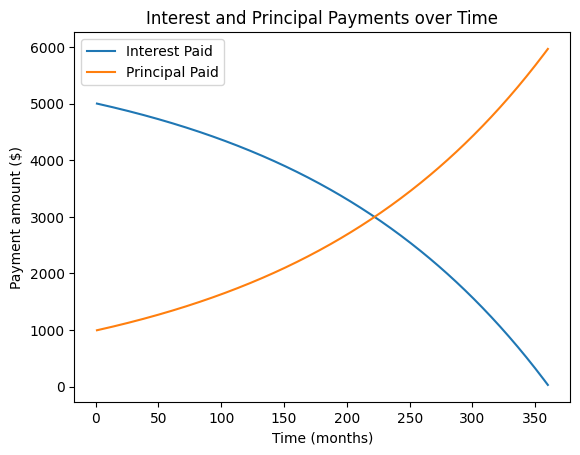

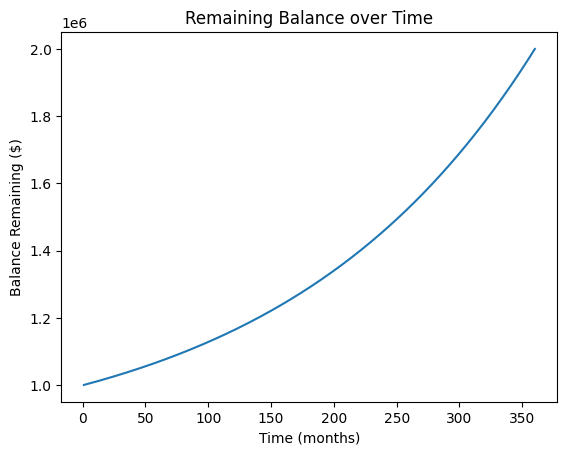

,Period,Payment,Interest Paid,Principal Paid,Balance Remaining
0,1,5995.51,5000.00,995.51,1000995.51
1,2,5995.51,4995.02,1000.48,1001995.99
2,3,5995.51,4990.02,1005.49,1003001.47
3,4,5995.51,4984.99,1010.51,1004011.99
4,5,5995.51,4979.94,1015.57,1005027.55
...,...,...,...,...,...
355,356,5995.51,147.67,5847.84,1976314.78
356,357,5995.51,118.43,5877.08,1982191.86
357,358,5995.51,89.04,5906.46,1988098.33
358,359,5995.51,59.51,5936.00,1994034.32


In [12]:
generate_amortization(loan_value=1000000, interest_rate=0.06, loan_length=30*12)


### Question 2
Write a function to implement the Newton-Raphson optimization method to calculate the IRR of cash flows.
The function should:
1.	Take as input a numpy array of cashflows, an initial guess for the IRR (optional), and an epsilon ε tolerance level (optional).
a.	Numpy array input: Element 0 is the time 0 cash flow, Element t is the time t cash flow
b.	Set guess = 0.05 as the default value if not provided by the function call
c.	Set ε = 0.001 as the default value if not provided by the function call
d.	Hint: please google “create optional arguments function python” to learn how to make certain arguments optional and set default values if not provided
2.	Implement the Newton-Raphson optimization method to calculate the IRR of the cash flows based on the initial guess and tolerance
a.	Hint: You may find it useful to define functions to calculate the present value of cash flows and the derivative of the present value function
3.	Provide debugging informational output via a print statement, on how the optimization method arrived at the answer
    - Output should show each iteration number, what the method is using as the guess, what the present value is at that guess and the new guess (if applicable)
    - Output should also show the total number of iterations taken and the final answer for the IRR
4.	Output a plot where the x-axis is the iteration number and the y-axis is the IRR guess at each iteration.


In [10]:
def pv_stream(CFs,r):
    '''
    CFs is a numpy array, where position t is cash flow at time=t. position 0 if time0 CF
    r is interest rate
    '''
    pvarray=np.array([c/((1+r)**t) for t,c in enumerate(CFs)])
    return pvarray.sum()

In [11]:
def df_x(CFs,r):
    '''
    CFs is a numpy array
    r is the interest rate
    
    returns the derivate evaluated at r of the PV(CFs)
    '''
    
    dfarray=np.array([-t*(c/((1+r)**(1+t))) for t,c in enumerate(CFs)])
    return dfarray.sum()

In [12]:
def irr(CFs, guess=.05, tol=.001):
    '''
    CFs is a numpy array of cash flows
    guess is the initial guess for the IRR
    tol is the tolerance, i.e. how close to zero before exiting the iteration
    '''
    x=guess
    guessarr=np.array([x])
    count=1
    print("Iteration: ", count, "\n Guess is ", x, "\n PV is: ", pv_stream(CFs, x))
    while( abs(pv_stream(CFs,x))>tol):
        x=x-(pv_stream(CFs,x)/df_x(CFs,x))
        guessarr=np.append(guessarr, x)
        count=count+1
        print("Iteration: ", count, "\n Guess is ", x, "\n PV is: ", pv_stream(CFs, x))
    plt.plot(guessarr)
    print("Final Answer is: {}, It took {} iterations".format(x,count))
    return x

Iteration:  1 
 Guess is  0.05 
 PV is:  24.195802209592735
Iteration:  2 
 Guess is  0.11511144354634353 
 PV is:  3.0542326841088787
Iteration:  3 
 Guess is  0.12590633194498418 
 PV is:  0.06524754566690127
Iteration:  4 
 Guess is  0.12614713751482987 
 PV is:  3.1276491329279565e-05
Final Answer is: 0.12614713751482987, It took 4 iterations


0.12614713751482987

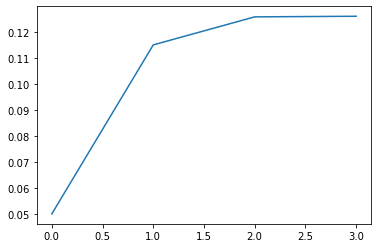

In [13]:
irr(np.array([-100, 10, 30, 50, 30, 25]))

Iteration:  1 
 Guess is  0.05 
 PV is:  86.12961787756988
Iteration:  2 
 Guess is  0.1164687576451442 
 PV is:  12.58302576528353
Iteration:  3 
 Guess is  0.12984106945658697 
 PV is:  0.3788120063986611
Iteration:  4 
 Guess is  0.1302690872642795 
 PV is:  0.0003683457706742388
Final Answer is: 0.1302690872642795, It took 4 iterations


0.1302690872642795

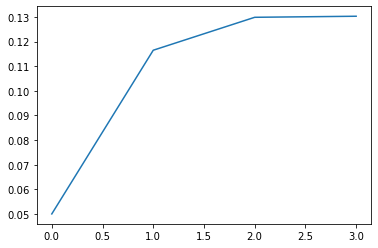

In [14]:
irr(np.array([-200,-200,150,300,5, 0, 75, 30]))

Iteration:  1 
 Guess is  0.05 
 PV is:  776.4065551181017
Iteration:  2 
 Guess is  0.13735480650254306 
 PV is:  188.27622614750612
Iteration:  3 
 Guess is  0.17486441743364148 
 PV is:  19.882670569927566
Iteration:  4 
 Guess is  0.17982802307620302 
 PV is:  0.2861288889705662
Iteration:  5 
 Guess is  0.1799015576723514 
 PV is:  6.131775479190082e-05
Final Answer is: 0.1799015576723514, It took 5 iterations


0.1799015576723514

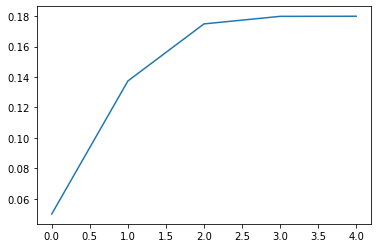

In [15]:
irr(np.array([-1000,300,-50,0,600,250,100,800,110,200]))

### Question 3
Write a function in python that calculates the payback period for a series of cash flows.
The function will take as input:
1.	A numpy array of cash flows. You can assume that element 0 is negative, representing the investment at t=0. You can also assume that all t>0 elements are positive, representing the cash flows at t=1 to t=N.
2. The function will return as output the payback period for the investment (the first year that the revenue is greater than or equal to the initial investment). If the project does not payback its initial investment, it should return -999.


In [16]:
def payback_per(CFs):
    '''
    CFs is a numpy array of cashflows
    Assumption is that element 0 is negative, representing the investment at t=0
    Assumption is that all positive elements are positive, representing the cash flows at t=1 to t=N
    
    Returns the minimum year t such that the sum of cash flows from 1 to t, inclusive, is greater than or equal to
    the initial investment at t=0
    '''
    
    cumsum=np.cumsum(CFs) #Cumulative sum of cash flows
    
    nonneg=(cumsum>=0) #nonneg is now an array of Booleans, value of True if cumsum>=0
    
    #Now just need to find the first element of nonneg that is True
    try:
        #np.where returns the element indices of nonneg which meet a certain condition
        # here just want "==True"
        return np.array(np.where(nonneg)).min()
    except:
        # try/except runs the "try" section unless there is an Error, in which case
        # it will execute the "execpt" section
        return -999

In [17]:
def payback_per_alt(CFs):
    '''
    The previous function "payback_per" used the try/except method, which we did not learn in class
    You could also write the payback period function without using try/except, which I demonstrate here.
    
    CFs is a numpy array of cashflows
    Assumption is that element 0 is negative, representing the investment at t=0
    Assumption is that all positive elements are positive, representing the cash flows at t=1 to t=N
    
    Returns the minimum year t such that the sum of cash flows from 1 to t, inclusive, is greater than or equal to
    the initial investment at t=0
    '''
    
    #First check if the total sum is less than 0, if it is then it doesn't payback
    #and can return -999
    
    totsum=np.sum(CFs)
    if totsum<0:
        return -999
    else:
        cumsum=CFs[0]
        i=0
        while (cumsum<0):
            i=i+1
            cumsum=cumsum+CFs[i]
            '''
            Note that in this while loop I have not put in a check to make sure i < len(CFs)
            This is generally a bad idea since if i>len(CFs) then we would
            try to access an element in CFs that doesn't exist
            However, this is not a problem in our case because we've already verified that
            the total sum is >=0 with our if statement. So we are guaranteed to 
            find a cumulative sum >=0 before i > len(CFs)
            '''
        return i

In [18]:
payback_per_alt(np.array([-100, 10, 30, 50, 30, 25]))

4

In [19]:
payback_per_alt(np.array([-200,50,10,20,5,0,5,10]))

-999

In [20]:
payback_per_alt(np.array([-1000,300,200,0,100,400]))

5

### Question 4 Part A
- Plot the yield curve for all available maturities on Dec 31 2019, Feb 24 2020, Mar 4 2020, and Mar 24 2020 on the same graph. Label it appropriately.
- Discuss how the yield curve changed over these three months. What was going on in the world during this time and why do you think it would affect bond yields (at the short-term and long-term maturities) the way it did?


In [13]:
df=pd.read_csv('yield-curve-rates-1990-2021.csv')
df

,Date,1 Mo,1 Yr,10 Yr,2 Mo,2 Yr,20 Yr,3 Mo,3 Yr,30 Yr,4 Mo,5 Yr,6 Mo,7 Yr
0,12/31/2021,0.06,0.39,1.52,0.05,0.73,1.94,0.06,0.97,1.90,NaN,1.26,0.19,1.44
1,12/30/2021,0.06,0.38,1.52,0.06,0.73,1.97,0.05,0.98,1.93,NaN,1.27,0.19,1.44
2,12/29/2021,0.01,0.38,1.55,0.02,0.75,2.00,0.05,0.99,1.96,NaN,1.29,0.19,1.47
3,12/28/2021,0.03,0.39,1.49,0.04,0.74,1.94,0.06,0.99,1.90,NaN,1.27,0.20,1.41
4,12/27/2021,0.04,0.33,1.48,0.05,0.76,1.92,0.06,0.98,1.88,NaN,1.26,0.21,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,1/8/1990,NaN,7.81,8.02,NaN,7.90,NaN,7.79,7.95,8.09,NaN,7.92,7.88,8.05
8004,1/5/1990,NaN,7.79,7.99,NaN,7.90,NaN,7.79,7.94,8.06,NaN,7.92,7.85,8.03
8005,1/4/1990,NaN,7.82,7.98,NaN,7.92,NaN,7.84,7.93,8.04,NaN,7.91,7.90,8.02
8006,1/3/1990,NaN,7.85,7.99,NaN,7.94,NaN,7.89,7.96,8.04,NaN,7.92,7.94,8.04


In [14]:
yields=df.drop(columns="4 Mo")
yields.set_index('Date', inplace=True)

In [15]:
yields.columns

Index(['1 Mo', '1 Yr', '10 Yr', '2 Mo', '2 Yr', '20 Yr', '3 Mo', '3 Yr',
       '30 Yr', '5 Yr', '6 Mo', '7 Yr'],
      dtype='object')

In [16]:
order=['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']
sortedyields=yields[order].copy()
sortedyields


,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
12/31/2021,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
12/30/2021,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
12/29/2021,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
12/28/2021,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
12/27/2021,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...
1/8/1990,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1/5/1990,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1/4/1990,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04


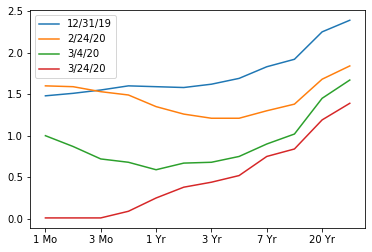

In [31]:
sortedyields.loc['12/31/2019'].transpose().plot(label='12/31/19')
sortedyields.loc['2/24/2020'].transpose().plot(label='2/24/20')
sortedyields.loc['3/4/2020'].transpose().plot(label='3/4/20')
sortedyields.loc['3/24/2020'].transpose().plot(label='3/24/20')
plt.legend()

Discuss how the yield curve changed over these three months. 
What was going on in the world during this time and why do you think it would affect bond yields
(at the short-term and long-term maturities) the way it did?

- On Dec 31, the yield curve had a normal, slightly positive slope with a 1.5% yield for 1Mo Treasuries and a roughly 2.5% yield on 30Yr Treasuries.
- Over the course of the next 3 months, both short and long-term yields fell quite a bit. You can see the biggest drop in short-term yields happened within a span of a few weeks in March, when most of the COVID lockdowns in the US started.
- The 1Mo rate was at 1% on March 4th but fell to about 0% by March 24th.
- This big decline in yields, especially in short-term yields, reflects a "flight to safety" where investors seek out the least risky investment (short-term Treasuries) during times of high market uncertainty and negative economic news (due to the start of the pandemic).

### Question 4 Part B
- Compute the spread, or the difference, between the 5-year yield and 2-year yield (5yr – 2yr) over the entire series (1990-2021).
- Plot this spread over time and label the plot appropriately
- In the same graph, plot grey colored vertical bars that span the recession periods over this time period: https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions
- Do you notice any pattern?



In [25]:
sortedyields['5_2_spread']=sortedyields['5 Yr']-sortedyields['2 Yr']


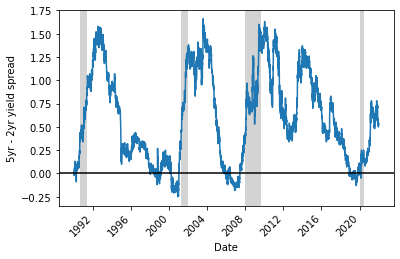

In [26]:
import datetime as dt
sortedyields.set_index(pd.to_datetime(sortedyields.index, format="%m/%d/%Y"), inplace=True)
sortedyields['5_2_spread'].plot()
plt.xticks(rotation=45)
# 1990 recession
plt.axvspan(dt.date(1990,8,1), dt.date(1991,3,31), color='lightgrey')
# 2001 recession
plt.axvspan(dt.date(2001,4,1), dt.date(2001,11,30), color='lightgrey')
# 2008 recession
plt.axvspan(dt.date(2008,1,1), dt.date(2009,6,30), color='lightgrey')
# 2020 recession
plt.axvspan(dt.date(2020,2,1), dt.date(2020,4,30), color='lightgrey')
plt.axhline(y=0,color='k')
plt.ylabel("5yr - 2yr yield spread")
plt.show()

- Spreads are negative just before a recession
- i.e. the yield curve (at least at the 5-2 year mark is "inverted" prior to these recessions
- Spreads rise a lot during recession periods
- This means that investors are demanding higher returns on 5-year government bonds than 2-year government bonds during a recession